# Path to Zenodo files folder

In [1]:
path = 'PATH/TO/ZENODO/FILES/FOLDER'

# Figure 4

In [2]:
# Definitions

P06241 = 'ACGCTTTTCGTTGCATTGTATGATTATGAAGCAAGAACTGAAGATGATTTGTCTTTCCATAAAGGTGAAAAATTCCAAATCTTGAATTCTTCTGAAGGTGATTGGTGGGAAGCAAGATCTTTGACTACTGGTGAAACTGGTTATATCCCATCTAACTATGTCGCGCCTGTG'
P01053 = 'AAAACTGAATGGCCAGAATTGGTTGGTAAATCTGTCGAAGAAGCAAAAAAAGTTATCTTGCAAGATAAACCAGAAGCACAAATCATTGTTTTGCCAGTTGGTACTATTGTTACTATGGAATATAGAATTGATAGAGTCAGATTGTTTGTCGATAAATTGGATAATATCGCACAAGTTCCAAGAGTTGGT'

cores = {'P01053' : [11,18,27,45,47,49,55],
        'P06241' : [2,16,18,24,26,48,53]}

## Panel a

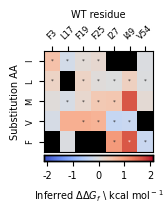

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd

coefs = pd.read_csv(path+'Fig3/FYN-SH3/FYN_mochi_order2/task_1/weights/weights_Folding.txt',
                       sep='\t')
coefs.rename(columns={'mean_kcal/mol':'mean_kcal_mol', 'std_kcal/mol':'std_kcal_mol', 'ci95_kcal/mol':'ci95_kcal_mol'}, inplace=True)
for index, row in coefs.iterrows():
    if row.id_ref =='WT':
        coefs.at[index,'order']=0
    else:
        coefs.at[index,'order']=len(row.id.split('_'))
#coefs=coefs.set_index('id')


firstorderterms=coefs.loc[coefs['order']==1].copy()

for index, row in firstorderterms.iterrows():
    firstorderterms.at[index,'mut_from']=row.id[0:-1]
    firstorderterms.at[index,'mut_to']=row.id[-1]

real_pos = [2,16,18,24,26,48,53]
mutated_positions = []

for index, row in firstorderterms.iterrows():
    if row.id !='WT' and row.mut_from not in mutated_positions:
        mutated_positions.append(row.mut_from)

coefs_hm=pd.DataFrame(columns=mutated_positions)

for index, row in firstorderterms.iterrows():
    if row.id !='WT':
        coefs_hm.at[row.mut_to,row.mut_from]=row.mean_kcal_mol

coefs_sparse_model = pd.read_csv(path+'Fig3/FYN-SH3/FYN_mochi_order2_sparse_regularized/task_4/weights/weights_Folding.txt',
                       sep='\t')
coefs_sparse_model.rename(columns={'mean_kcal/mol':'mean_kcal_mol', 'std_kcal/mol':'std_kcal_mol', 'ci95_kcal/mol':'ci95_kcal_mol'}, inplace=True)
for index, row in coefs_sparse_model.iterrows():
    if row.id_ref == 'WT':
        coefs_sparse_model.at[index,'order']=0
    else:
        coefs_sparse_model.at[index,'order']=len(row.id.split('_'))
coefs_sparse_model=coefs_sparse_model.set_index('id')
#coefs_sparse_model=coefs_sparse_model.loc[coefs_sparse_model['order']==1].copy()

for index, row in coefs_sparse_model.iterrows():
    coefs_sparse_model.at[index,'mut_from']=row.id_ref[0:-1]
    coefs_sparse_model.at[index,'mut_to']=row.id_ref[-1]
    
coefs_hm_sparse_model = pd.DataFrame(columns=mutated_positions)

for index, row in coefs_sparse_model.iterrows():
    if row.id_ref !='WT' and row.order==1:
        coefs_hm_sparse_model.at[row.mut_to,row.mut_from]='*'
coefs_hm_sparse_model=coefs_hm_sparse_model.fillna('')

fig, ax = plt.subplots(figsize=(1.4,1.6))

#ax=sns.heatmap(coefs_hm.fillna(0), cmap='coolwarm', vmin=-1*max(coefs_hm.fillna(0).max()), vmax=max(coefs_hm.fillna(0).max()),cbar_kws={"orientation": "horizontal", "pad": 0.02, 'location':'bottom'}, xticklabels=True, yticklabels=True)
singles_boundary=2.1
ax=sns.heatmap(coefs_hm.fillna(0), cmap='coolwarm', vmin=-1*singles_boundary, vmax=singles_boundary,cbar_kws={"orientation": "horizontal", "pad": 0.03, 'location':'bottom'}, xticklabels=True, yticklabels=True,
               annot=coefs_hm_sparse_model.to_numpy().tolist(), fmt= '', annot_kws={'size':4})
ax.figure.axes[-1].set_xticks(ticks=np.arange(-2,3,1),labels=np.arange(-2,3,1), fontsize=7)
ax.figure.axes[-1].set_xlabel(r'Inferred ${ΔΔG_{f}}$ \ kcal mol$^-$$^1$', rotation=0, labelpad=5, fontsize=7)
plt.tick_params(axis='both', which='both', labelsize=7, labelbottom = False, bottom=False, top = True, labeltop=True)
plt.yticks(fontsize=6)
plt.xticks(fontsize=6, rotation=45)
plt.xlabel('WT residue',  fontsize=7)
ax.xaxis.set_label_position('top') 
plt.ylabel('Substitution AA', fontsize=7)
ax.spines[['right','top','left','bottom']].set_visible(True)
#plt.title('Background-averaged\nmutational effects',fontsize=18)
for spine in ax.figure.axes[-1].spines.values():
    spine.set(visible=True,lw=1,edgecolor='black')

for i in mutated_positions:
    for j in mutated_positions:
        if i[0]==j[0]:
            col=coefs_hm.columns.get_loc(i)
            row=coefs_hm.index.get_loc(j[0])
            ax.add_patch(Rectangle((col, row), 1, 1, fill=True,edgecolor='black', lw=0.0001, facecolor='black'))
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_1storderterms_2ndordermodel_ddGs.svg', dpi=300, transparent=True, bbox_inches='tight')

In [4]:
import pandas as pd
rocklin = pd.read_csv(path+"Fig4/Tsuboyama2023_Dataset1_20230416.csv")

In [5]:
from Bio.Seq import Seq

query_protein='P06241'
pdb='1A0N'
DTS = ['F', 'L', 'I', 'V', 'M']

for index, row in rocklin[rocklin['name'].str.startswith(pdb)].iterrows():
    if len(row['name'].split('_'))>1:
        if row['name'].split('_')[1]=='scramble':
            rocklin.at[index,'scramble']=True

query_protein_wt = str(Seq(P06241).translate())
rocklin_query_protein = rocklin[rocklin['name'].str.startswith(pdb)].loc[rocklin['scramble']!=True].copy()

for index, row in rocklin_query_protein.iterrows():
    mutations=[]
    core_mutant=[]
    iterator=0
    for wt_res, var_res in zip(query_protein_wt, str(Seq(row.dna_seq).translate())[8:-7]):
        if wt_res != var_res:
            mutations.append(wt_res+str(iterator)+var_res)
            if iterator in cores[query_protein]:
                core_mutant.append(True)
            else:
                core_mutant.append(False)
        iterator+=1
    if all(i==True for i in core_mutant)==True:
        rocklin_query_protein.at[index,'core_mutant']=True
    else:
        rocklin_query_protein.at[index,'core_mutant']=False
    var_core=[]
    for core_pos in cores[query_protein]:
        var_core.append(str(Seq(row.dna_seq).translate())[8:-7][core_pos])
    rocklin_query_protein.at[index,'core']=''.join(var_core)
    if set(var_core) <= set(DTS):
        rocklin_query_protein.at[index,'DTS_core']=True
    else:
        rocklin_query_protein.at[index,'DTS_core']=False
    if len(mutations)>0:
        rocklin_query_protein.at[index,'mutations']=mutations
    rocklin_query_protein.at[index,'Nham']=len(mutations)
    if len(mutations)==1 and len(row['name'].split('_'))>2:
        rocklin_query_protein.at[index,'redundant_single']=True

real_fyn_singles=rocklin_query_protein.loc[rocklin_query_protein['Nham']==1].loc[rocklin_query_protein['core_mutant']==True].loc[rocklin_query_protein['DTS_core']==True].loc[rocklin_query_protein['redundant_single']!=True]

import seaborn as sns

rocklin_singles = real_fyn_singles.copy()
for index, row in rocklin_singles.iterrows():
    rocklin_singles.at[index,'mutations']=row.mutations[0][:1]+str(int(row.mutations[0][1:-1])+1)+row.mutations[0][-1]

merged = firstorderterms[['id', 'mean_kcal_mol', 'std_kcal_mol']].merge(rocklin_singles[['mutations', 'deltaG', 'deltaG_95CI']], left_on='id', right_on='mutations')
merged.set_index('id', inplace=True)
del merged['mutations']
merged

,mean_kcal_mol,std_kcal_mol,deltaG,deltaG_95CI
id,,,,
F3I,0.560962,0.102125,2.907970,0.142996
F3L,0.268793,0.054489,3.429269,0.208434
F3M,0.049056,0.097655,4.509852,0.159364
F3V,-0.127578,0.086498,4.803552,0.085831
L17F,-0.046252,0.101517,4.494621,0.104096
L17I,-0.178472,0.123540,4.907191,0.196571
L17M,-0.098930,0.098577,5.205858,0.144808
L17V,0.817100,0.119803,3.766750,0.096021
F19I,0.070597,0.166062,3.777897,0.105124


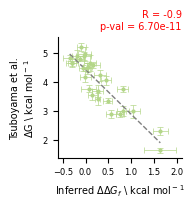

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

df = merged.sort_values('mean_kcal_mol').copy()

g = sns.FacetGrid(data=df, aspect=2)
g.map(plt.errorbar, 'mean_kcal_mol', 'deltaG', 'deltaG_95CI','std_kcal_mol', fmt='o', elinewidth=0.5, capsize=2, capthick=0.5, markersize=2, color='#B4D689')
g.fig.set_size_inches(1.4,1.6)
g.tick_params(axis='both', which='major', labelsize=6)

x = df[['mean_kcal_mol']].to_numpy()
y = df[['deltaG']].to_numpy()


model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),x.ravel())

plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
plt.xlabel(r'Inferred ${ΔΔG_{f}}$ \ kcal mol$^-$$^1$', fontsize=7)
plt.ylabel('Tsuboyama et al.\nΔG \ kcal mol$^-$$^1$', fontsize=7)
plt.title('R = '+str(round(r,2))+'\np-val = '+'{:0.2e}'.format(p), fontsize=7, color='red',loc='right',y=1)
plt.xticks(np.arange(-0.5,2.5,0.5))
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_inferred_from_2ndordermodel_ddG_Tsuboyama.svg', dpi=300, transparent=True)

## Panel b

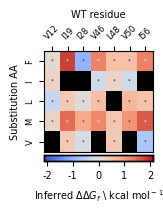

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import numpy as np

coefs = pd.read_csv(path+'Fig3/CI-2A/CI-2A_mochi_order2/task_1/weights/weights_Folding.txt',
                       sep='\t')
coefs.rename(columns={'mean_kcal/mol':'mean_kcal_mol', 'std_kcal/mol':'std_kcal_mol', 'ci95_kcal/mol':'ci95_kcal_mol'}, inplace=True)
for index, row in coefs.iterrows():
    coefs.at[index,'order']=len(row.id.split('_'))
#coefs=coefs.set_index('id')


firstorderterms=coefs.loc[coefs['order']==1].copy()

for index, row in firstorderterms.iterrows():
    firstorderterms.at[index,'mut_from']=row.id[0:-1]
    firstorderterms.at[index,'mut_to']=row.id[-1]

real_pos = [2,16,18,24,26,48,53]
mutated_positions = []

for index, row in firstorderterms.iterrows():
    if row.id !='WT' and row.mut_from not in mutated_positions:
        mutated_positions.append(row.mut_from)

coefs_hm=pd.DataFrame(columns=mutated_positions)

for index, row in firstorderterms.iterrows():
    if row.id !='WT':
        coefs_hm.at[row.mut_to,row.mut_from]=row.mean_kcal_mol
        
        
coefs_sparse_model = pd.read_csv(path+'Fig3/CI-2A/CI-2A_mochi_order2_sparse_regularized/task_4/weights/weights_Folding.txt',
                       sep='\t')
coefs_sparse_model.rename(columns={'mean_kcal/mol':'mean_kcal_mol', 'std_kcal/mol':'std_kcal_mol', 'ci95_kcal/mol':'ci95_kcal_mol'}, inplace=True)
for index, row in coefs_sparse_model.iterrows():
    if row.id_ref == 'WT':
        coefs_sparse_model.at[index,'order']=0
    else:
        coefs_sparse_model.at[index,'order']=len(row.id.split('_'))
coefs_sparse_model=coefs_sparse_model.set_index('id')
#coefs_sparse_model=coefs_sparse_model.loc[coefs_sparse_model['order']==1].copy()

for index, row in coefs_sparse_model.iterrows():
    coefs_sparse_model.at[index,'mut_from']=row.id_ref[0:-1]
    coefs_sparse_model.at[index,'mut_to']=row.id_ref[-1]
    
coefs_hm_sparse_model = pd.DataFrame(columns=mutated_positions)

for index, row in coefs_sparse_model.iterrows():
    if row.id_ref !='WT' and row.order==1:
        coefs_hm_sparse_model.at[row.mut_to,row.mut_from]='*'
coefs_hm_sparse_model=coefs_hm_sparse_model.fillna('')

fig, ax = plt.subplots(figsize=(1.4,1.6))

#ax=sns.heatmap(coefs_hm.fillna(0), cmap='coolwarm', vmin=-1*max(coefs_hm.fillna(0).max()), vmax=max(coefs_hm.fillna(0).max()),cbar_kws={"orientation": "horizontal", "pad": 0.02, 'location':'bottom'}, xticklabels=True, yticklabels=True)
singles_boundary=2.1
ax=sns.heatmap(coefs_hm.fillna(0), cmap='coolwarm', vmin=-1*singles_boundary, vmax=singles_boundary,cbar_kws={"orientation": "horizontal", "pad": 0.03, 'location':'bottom'}, xticklabels=True, yticklabels=True,
               annot=coefs_hm_sparse_model.to_numpy().tolist(), fmt= '', annot_kws={'size':4})
ax.figure.axes[-1].set_xticks(ticks=np.arange(-2,3,1),labels=np.arange(-2,3,1), fontsize=7)
ax.figure.axes[-1].set_xlabel(r'Inferred ${ΔΔG_{f}}$ \ kcal mol$^-$$^1$', rotation=0, labelpad=5, fontsize=7)
plt.tick_params(axis='both', which='both', labelsize=7, labelbottom = False, bottom=False, top = True, labeltop=True)
plt.yticks(fontsize=6)
plt.xticks(fontsize=6, rotation=45)
plt.xlabel('WT residue',  fontsize=7)
ax.xaxis.set_label_position('top') 
plt.ylabel('Substitution AA', fontsize=7)
ax.spines[['right','top','left','bottom']].set_visible(True)
#plt.title('Background-averaged\nmutational effects',fontsize=18)
for spine in ax.figure.axes[-1].spines.values():
    spine.set(visible=True,lw=1,edgecolor='black')

for i in mutated_positions:
    for j in mutated_positions:
        if i[0]==j[0]:
            col=coefs_hm.columns.get_loc(i)
            row=coefs_hm.index.get_loc(j[0])
            ax.add_patch(Rectangle((col, row), 1, 1, fill=True,edgecolor='black', lw=0.0001, facecolor='black'))
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('CI-2A_Mochi_1storderterms_2ndordermodel_ddGs.svg', dpi=300, transparent=True, bbox_inches='tight')

In [8]:
from Bio.Seq import Seq

query_protein='P01053'
pdb='3CI2'
DTS = ['F', 'L', 'I', 'V', 'M']

for index, row in rocklin[rocklin['name'].str.startswith(pdb)].iterrows():
    if len(row['name'].split('_'))>1:
        if row['name'].split('_')[1]=='scramble':
            rocklin.at[index,'scramble']=True

query_protein_wt = str(Seq(P01053).translate())
rocklin_query_protein = rocklin[rocklin['name'].str.startswith(pdb)].loc[rocklin['scramble']!=True].copy()

for index, row in rocklin_query_protein.iterrows():
    mutations=[]
    core_mutant=[]
    iterator=0
    for wt_res, var_res in zip(query_protein_wt, str(Seq(row.dna_seq).translate())[4:-5]):
        if wt_res != var_res:
            mutations.append(wt_res+str(iterator)+var_res)
            if iterator in cores[query_protein]:
                core_mutant.append(True)
            else:
                core_mutant.append(False)
        iterator+=1
    if all(i==True for i in core_mutant)==True:
        rocklin_query_protein.at[index,'core_mutant']=True
    else:
        rocklin_query_protein.at[index,'core_mutant']=False
    var_core=[]
    for core_pos in cores[query_protein]:
        var_core.append(str(Seq(row.dna_seq).translate())[4:-5][core_pos])
    rocklin_query_protein.at[index,'core']=''.join(var_core)
    if set(var_core) <= set(DTS):
        rocklin_query_protein.at[index,'DTS_core']=True
    else:
        rocklin_query_protein.at[index,'DTS_core']=False
    if len(mutations)>0:
        rocklin_query_protein.at[index,'mutations']=mutations
    rocklin_query_protein.at[index,'Nham']=len(mutations)
    if len(mutations)==1 and len(row['name'].split('_'))>2:
        rocklin_query_protein.at[index,'redundant_single']=True
    else:
        rocklin_query_protein.at[index,'redundant_single']=False

real_fyn_singles=rocklin_query_protein.loc[rocklin_query_protein['Nham']==1].loc[rocklin_query_protein['core_mutant']==True].loc[rocklin_query_protein['DTS_core']==True].loc[rocklin_query_protein['redundant_single']!=True]

import seaborn as sns

rocklin_singles = real_fyn_singles.copy()
for index, row in rocklin_singles.iterrows():
    rocklin_singles.at[index,'mutations']=row.mutations[0][:1]+str(int(row.mutations[0][1:-1])+1)+row.mutations[0][-1]

merged = firstorderterms[['id', 'mean_kcal_mol', 'std_kcal_mol']].merge(rocklin_singles[['mutations', 'deltaG', 'deltaG_95CI']], left_on='id', right_on='mutations')
merged.set_index('id', inplace=True)
del merged['mutations']
merged

,mean_kcal_mol,std_kcal_mol,deltaG,deltaG_95CI
id,,,,
V12F,0.133974,0.074684,1.505453,0.073157
V12I,0.269149,0.179249,1.780312,0.060700
V12L,-0.335258,0.110445,1.801952,0.086684
V12M,0.231983,0.220112,1.585533,0.100806
I19F,1.808068,0.372398,0.767560,0.119241
I19L,0.455885,0.063182,1.511328,0.175352
I19M,1.491126,0.243979,0.637037,0.128425
I19V,0.432845,0.133775,1.638543,0.071042
I28F,-0.987668,0.224421,1.771296,0.177923


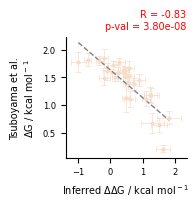

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

df = merged.sort_values('mean_kcal_mol').copy()

g = sns.FacetGrid(data=df, aspect=2)
g.map(plt.errorbar, 'mean_kcal_mol', 'deltaG', 'deltaG_95CI','std_kcal_mol', fmt='o', elinewidth=0.5, capsize=2, capthick=0.5, markersize=2, color='#F6DCC9')
g.fig.set_size_inches(1.4,1.6)
g.tick_params(axis='both', which='major', labelsize=6)

x = df[['mean_kcal_mol']].to_numpy()
y = df[['deltaG']].to_numpy()


model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),x.ravel())

plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
plt.xlabel('Inferred ΔΔG / kcal mol$^-$$^1$', fontsize=7)
plt.ylabel('Tsuboyama et al.\nΔG / kcal mol$^-$$^1$', fontsize=7)
plt.title('R = '+str(round(r,2))+'\np-val = '+'{:0.2e}'.format(p), fontsize=7,color='red',loc='right',y=1)

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('CI-2A_inferred_from_2ndordermodel_ddG_Tsuboyama.svg', dpi=300, transparent=True)

## Panel c

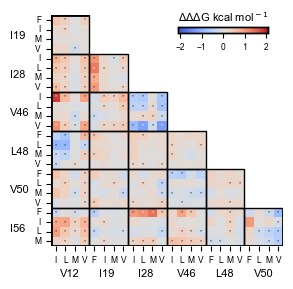

In [10]:
from matplotlib.patches import Rectangle
import seaborn as sns
import matplotlib.pyplot as plt
import math

plt.rcParams['font.family'] = 'Arial'

coefs = pd.read_csv(path+'Fig3/FYN-SH3/FYN_mochi_order2/task_1/weights/weights_Folding.txt',
                       sep='\t')
coefs.rename(columns={'mean_kcal/mol':'mean_kcal_mol', 'std_kcal/mol':'std_kcal_mol', 'ci95_kcal/mol':'ci95_kcal_mol'}, inplace=True)
for index, row in coefs.iterrows():
    if row.id_ref == 'WT':
        coefs.at[index,'order']=0
    else:
        coefs.at[index,'order']=len(row.id.split('_'))

secondorderterms=coefs.loc[coefs['order']==2].copy()

wt ='FLFFIIV'
mut_pos_name = [2,16,18,24,26,48,53]


secondorderterms['mutation1']='a'
secondorderterms['mutation2']='a'
for index,row in secondorderterms.iterrows():
    secondorderterms.at[index,'mutation1']=row.id.split('_')[0]
    secondorderterms.at[index,'mutation2']=row.id.split('_')[1]

single_mutations=[]
for index, row in secondorderterms.iterrows():
    if row.mutation1 not in single_mutations:
        single_mutations.append(row.mutation1)
for index, row in secondorderterms.iterrows():
    if row.mutation2 not in single_mutations:
        single_mutations.append(row.mutation2)    

pairwise_secondorderterms=pd.DataFrame(columns=single_mutations)

for index, row in secondorderterms.iterrows():
    pairwise_secondorderterms.at[row.mutation1,row.mutation2]=row.mean_kcal_mol

for index, row in secondorderterms.iterrows():
    pairwise_secondorderterms.at[row.mutation2,row.mutation1]=row.mean_kcal_mol

pairwise_secondorderterms=pairwise_secondorderterms.fillna(0)
pairwise_secondorderterms=pairwise_secondorderterms.reindex(single_mutations)

fig, ax=plt.subplots(figsize=(3,3))
for mutation_nr, mutation in enumerate(mutated_positions[1:]):
    plt.text(-4.2, 2.5+4*mutation_nr, mutation, fontsize=8)
for mutation_nr, mutation in enumerate(mutated_positions[:-1]):
    plt.text(1+4*mutation_nr, 27.2, mutation, fontsize=8)


# Create a custom mask
mask = np.zeros_like(pairwise_secondorderterms.iloc[4:,:-4], dtype=bool)
for i in range(len(pairwise_secondorderterms.iloc[4:,:-4].index)):
    for j in range(i+1, len(pairwise_secondorderterms.iloc[4:,:-4].index)):  # Only mask rows and columns in the upper diagonal
        if (i // 4) < (j // 4):  # Mask entire quadrants in the upper diagonal
            mask[i, j] = True


coefs_sparse_model = pd.read_csv(path+'/Fig3/FYN-SH3/FYN_mochi_order2_sparse_regularized/task_4/weights/weights_Folding.txt',
                       sep='\t')
coefs_sparse_model.rename(columns={'mean_kcal/mol':'mean_kcal_mol', 'std_kcal/mol':'std_kcal_mol', 'ci95_kcal/mol':'ci95_kcal_mol'}, inplace=True)
for index, row in coefs_sparse_model.iterrows():
    coefs_sparse_model.at[index,'order']=len(row.id.split('_'))
coefs_sparse_model=coefs_sparse_model.set_index('id')

sparse_regularized_selected = pd.DataFrame(index=pairwise_secondorderterms.index, columns=pairwise_secondorderterms.columns)
for coupling in list(coefs_sparse_model.loc[coefs_sparse_model['order']==2].index):
    mutations=coupling.split('_')
    sparse_regularized_selected.at[mutations[0],mutations[1]]='*'
    sparse_regularized_selected.at[mutations[1],mutations[0]]='*'
    
sparse_regularized_selected=sparse_regularized_selected.fillna('')

couplings_boundary=2.1            
cbar_ax=fig.add_axes([0.55,0.82,0.3,0.02])
hmap=sns.heatmap(pairwise_secondorderterms.iloc[4:,:-4], cmap='coolwarm', center=0, xticklabels=True,yticklabels=True, mask=mask,vmin=-1*couplings_boundary, vmax=couplings_boundary,
              cbar_kws={"orientation": "horizontal", "pad": 0.02, 'ticks':list(np.arange(-2,3,1))}, ax=ax, cbar_ax=cbar_ax, annot=sparse_regularized_selected.iloc[4:,:-4].mask(mask).to_numpy().tolist(), fmt= '', annot_kws={'size':4})


#ax.figure.axes[-1].set_ylabel('ddG', rotation=270)
cbar_ax.set_xlabel('ΔΔΔG kcal mol$^-$$^1$', rotation=0, fontsize=8)
cbar_ax.xaxis.set_label_position('top')
for spine in cbar_ax.spines.values():
    spine.set(visible=True,lw=1,edgecolor='black')
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
    
labels_x = [item.get_text() for item in ax.get_xticklabels()]
for label_nr, label in enumerate(labels_x):
    labels_x[label_nr]=label[-1]
ax.set_xticklabels(labels_x, rotation=0,fontsize=6)
labels_y = [item.get_text() for item in ax.get_yticklabels()]
for label_nr, label in enumerate(labels_y):
    labels_y[label_nr]=label[-1]
ax.set_yticklabels(labels_y, rotation=0,fontsize=6)

for i in range(0, len(pairwise_secondorderterms.iloc[4:,:-4].index), 4):
    for j in range(0, len(pairwise_secondorderterms.iloc[4:,:-4].index), 4):
        if not np.any(mask[i:i+4, j:j+4]):
            rect = Rectangle((j, i), 4, 4, linewidth=1, edgecolor='black', facecolor='none')
            ax.add_patch(rect)

ax.axhline(y=len(pairwise_secondorderterms.iloc[4:,:-4].index), color='k',linewidth=2)
ax.axhline(y=0,xmin=0,xmax=0.16, color='k',linewidth=2)
ax.axvline(x=0, color='k',linewidth=2)
ax.axvline(x=len(pairwise_secondorderterms.iloc[4:,:-4].index),ymin=0,ymax=0.16, color='k',linewidth=2)

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_SH3_2or_pairwisecoup.svg', dpi=300, transparent=True, bbox_inches = "tight")
            

## Panel d

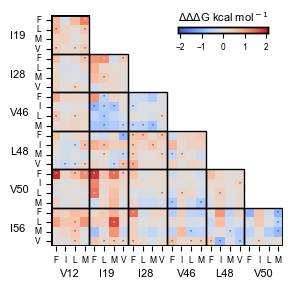

In [11]:
from matplotlib.patches import Rectangle
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'

coefs = pd.read_csv(path+'Fig3/CI-2A/CI-2A_mochi_order2/task_1/weights/weights_Folding.txt',
                       sep='\t')
coefs.rename(columns={'mean_kcal/mol':'mean_kcal_mol', 'std_kcal/mol':'std_kcal_mol', 'ci95_kcal/mol':'ci95_kcal_mol'}, inplace=True)
for index, row in coefs.iterrows():
    coefs.at[index,'order']=len(row.id.split('_'))

secondorderterms=coefs.loc[coefs['order']==2].copy()

wt ='FLFFIIV'
mut_pos_name = [2,16,18,24,26,48,53]


secondorderterms['mutation1']='a'
secondorderterms['mutation2']='a'
for index,row in secondorderterms.iterrows():
    secondorderterms.at[index,'mutation1']=row.id.split('_')[0]
    secondorderterms.at[index,'mutation2']=row.id.split('_')[1]

single_mutations=[]
for index, row in secondorderterms.iterrows():
    if row.mutation1 not in single_mutations:
        single_mutations.append(row.mutation1)
for index, row in secondorderterms.iterrows():
    if row.mutation2 not in single_mutations:
        single_mutations.append(row.mutation2)    

pairwise_secondorderterms=pd.DataFrame(columns=single_mutations)

for index, row in secondorderterms.iterrows():
    pairwise_secondorderterms.at[row.mutation1,row.mutation2]=row.mean_kcal_mol

for index, row in secondorderterms.iterrows():
    pairwise_secondorderterms.at[row.mutation2,row.mutation1]=row.mean_kcal_mol

pairwise_secondorderterms=pairwise_secondorderterms.fillna(0)
pairwise_secondorderterms=pairwise_secondorderterms.reindex(single_mutations)

fig, ax=plt.subplots(figsize=(3,3))
for mutation_nr, mutation in enumerate(mutated_positions[1:]):
    plt.text(-4.2, 2.5+4*mutation_nr, mutation, fontsize=8)
for mutation_nr, mutation in enumerate(mutated_positions[:-1]):
    plt.text(1+4*mutation_nr, 27.2, mutation, fontsize=8)

# Create a custom mask
mask = np.zeros_like(pairwise_secondorderterms.iloc[4:,:-4], dtype=bool)
for i in range(len(pairwise_secondorderterms.iloc[4:,:-4].index)):
    for j in range(i+1, len(pairwise_secondorderterms.iloc[4:,:-4].index)):  # Only mask rows and columns in the upper diagonal
        if (i // 4) < (j // 4):  # Mask entire quadrants in the upper diagonal
            mask[i, j] = True

coefs_sparse_model = pd.read_csv(path+'Fig3/CI-2A/CI-2A_mochi_order2_sparse_regularized/task_4/weights/weights_Folding.txt',
                       sep='\t')
coefs_sparse_model.rename(columns={'mean_kcal/mol':'mean_kcal_mol', 'std_kcal/mol':'std_kcal_mol', 'ci95_kcal/mol':'ci95_kcal_mol'}, inplace=True)
for index, row in coefs_sparse_model.iterrows():
    coefs_sparse_model.at[index,'order']=len(row.id.split('_'))
coefs_sparse_model=coefs_sparse_model.set_index('id')

sparse_regularized_selected = pd.DataFrame(index=pairwise_secondorderterms.index, columns=pairwise_secondorderterms.columns)
for coupling in list(coefs_sparse_model.loc[coefs_sparse_model['order']==2].index):
    mutations=coupling.split('_')
    sparse_regularized_selected.at[mutations[0],mutations[1]]='*'
    sparse_regularized_selected.at[mutations[1],mutations[0]]='*'
    
sparse_regularized_selected=sparse_regularized_selected.fillna('')
#sparse_regularized_selected=sparse_regularized_selected.replace('*','')

            
cbar_ax=fig.add_axes([0.55,0.82,0.3,0.02])
hmap=sns.heatmap(pairwise_secondorderterms.iloc[4:,:-4], cmap='coolwarm', center=0, xticklabels=True,yticklabels=True, mask=mask,vmin=-1*couplings_boundary, vmax=couplings_boundary,
              cbar_kws={"orientation": "horizontal", "pad": 0.02, 'ticks':list(np.arange(-2,3,1))}, ax=ax, cbar_ax=cbar_ax, annot=sparse_regularized_selected.iloc[4:,:-4].mask(mask).to_numpy().tolist(), fmt= '', annot_kws={'size':4})


#ax.figure.axes[-1].set_ylabel('ddG', rotation=270)
cbar_ax.set_xlabel('ΔΔΔG kcal mol$^-$$^1$', rotation=0, fontsize=8)
cbar_ax.xaxis.set_label_position('top')
for spine in cbar_ax.spines.values():
    spine.set(visible=True,lw=1,edgecolor='black')
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
    
labels_x = [item.get_text() for item in ax.get_xticklabels()]
for label_nr, label in enumerate(labels_x):
    labels_x[label_nr]=label[-1]
ax.set_xticklabels(labels_x, rotation=0,fontsize=6)
labels_y = [item.get_text() for item in ax.get_yticklabels()]
for label_nr, label in enumerate(labels_y):
    labels_y[label_nr]=label[-1]
ax.set_yticklabels(labels_y, rotation=0,fontsize=6)

for i in range(0, len(pairwise_secondorderterms.iloc[4:,:-4].index), 4):
    for j in range(0, len(pairwise_secondorderterms.iloc[4:,:-4].index), 4):
        if not np.any(mask[i:i+4, j:j+4]):
            rect = Rectangle((j, i), 4, 4, linewidth=1, edgecolor='black', facecolor='none')
            ax.add_patch(rect)

ax.axhline(y=len(pairwise_secondorderterms.iloc[4:,:-4].index), color='k',linewidth=2)
ax.axhline(y=0,xmin=0,xmax=0.16, color='k',linewidth=2)
ax.axvline(x=0, color='k',linewidth=2)
ax.axvline(x=len(pairwise_secondorderterms.iloc[4:,:-4].index),ymin=0,ymax=0.16, color='k',linewidth=2)

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('CI-2A_2or_pairwisecoup.svg', dpi=300, transparent=True, bbox_inches = "tight")

## Panel e

In [12]:
import pandas as pd
from seaborn import kdeplot

predicted_phenotypes = pd.read_csv(path+'Fig3/FYN-SH3/FYN_mochi_order2/task_1/predictions/predicted_phenotypes_supp.txt',
                                  sep='\t', lineterminator='\n', low_memory=False)

for index, row in predicted_phenotypes.iterrows():
    core=[]
    for i in cores['P06241']:
        core.append(row.aa_seq[i])
    predicted_phenotypes.at[index,'core'] = ''.join(core)

RT=303*0.001987
predicted_phenotypes['mean_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].mean(axis=1)
predicted_phenotypes['std_additive_trait']=predicted_phenotypes[['fold_1_additive_trait0','fold_2_additive_trait0','fold_3_additive_trait0','fold_4_additive_trait0','fold_5_additive_trait0','fold_6_additive_trait0','fold_7_additive_trait0','fold_8_additive_trait0','fold_9_additive_trait0','fold_10_additive_trait0']].std(axis=1)

predicted_phenotypes['mean']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].mean(axis=1)
predicted_phenotypes['std']=predicted_phenotypes[['fold_1','fold_2','fold_3','fold_4','fold_5','fold_6','fold_7','fold_8','fold_9','fold_10']].std(axis=1)

predicted_phenotypes['mean_dG']= predicted_phenotypes['mean_additive_trait']*RT
predicted_phenotypes['std_dG']= predicted_phenotypes['std_additive_trait']*RT

# Normalize data in the -1 to 0 range

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
def normalize_errors(values, bounds):
    return [x * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

predicted_phenotypes_scaled = predicted_phenotypes.copy()

reference=predicted_phenotypes.loc[predicted_phenotypes['WT']==True].iloc[0]['core']

fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='fitness',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['fitness']=normalize(list(predicted_phenotypes_scaled['fitness']),{'actual': {'lower': mode, 'upper': predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})


fig = plt.figure(figsize=(0,0))
lines = kdeplot(data=predicted_phenotypes,x='mean',linewidth=0).get_lines()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
plt.close()

predicted_phenotypes_scaled['mean']=normalize(list(predicted_phenotypes_scaled['mean']),{'actual': {'lower': mode, 'upper': predicted_phenotypes.loc[predicted_phenotypes['aa_seq']==str(Seq(P06241).translate())].iloc[0]['mean']}, 'desired': {'lower': -1, 'upper': 0}})
predicted_phenotypes_scaled['std'] = normalize_errors(list(predicted_phenotypes_scaled['std']),{'actual': {'lower': mode, 'upper':predicted_phenotypes.loc[predicted_phenotypes['aa_seq']==str(Seq(P06241).translate())].iloc[0]['mean']}, 'desired': {'lower': -1, 'upper': 0}})



In [13]:
# Define all variants separated by 1 mutation

from tqdm import tqdm
from itertools import product

DTS = ['F','L','I','M','V']
a=list(product(DTS,repeat=7))



dod={}
for variant in tqdm(a, total=len(a)):
    iterator=0
    positerator=0
    singles=[]
    for i in product(variant,DTS):
        mutant = ''.join(''.join(variant[:positerator])+str(i[1])+''.join(variant[positerator+1:]))
        if (iterator/5).is_integer() == True and iterator !=0:
            positerator+=1
        iterator+=1
        if mutant != ''.join(variant):
            singles.append(mutant)
    dod[''.join(variant)]=singles


100%|██████████| 78125/78125 [00:01<00:00, 54337.34it/s]


In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap
iterator_cmap = 10

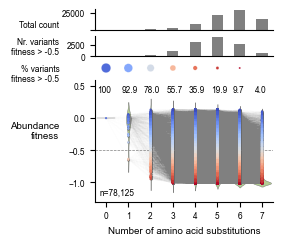

In [15]:
import seaborn as sns
import networkx as nx
from itertools import count
from seaborn import kdeplot
from itertools import groupby
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings('ignore')

protein='P06241'

protein_variants_scaled = predicted_phenotypes_scaled.sort_values('mean', ascending=False)

lines = kdeplot(data=protein_variants_scaled, x='mean', ax=ax).get_lines()
    
for line in lines:
    x, y = line.get_data()
    mode=x[np.argmax(y)]

G = nx.from_dict_of_lists(dod)
G_val = nx.from_dict_of_lists(dod)

pos={}
for index, row in protein_variants_scaled.iterrows():
    pos[row.core] = (row.Nham_aa, row['mean'])

fig, (ax0,axviable,ax1,ax2) = plt.subplots(4,1,gridspec_kw={'height_ratios':[2,2,1,12],'hspace': 0.15},figsize=(2.3,2.5))
plt.close()   
fig, (ax0,axviable,ax1,ax2) = plt.subplots(4,1,gridspec_kw={'height_ratios':[2,2,1,12],'hspace': 0.15},figsize=(2.3,2.5),sharex=ax1)


fig=sns.violinplot(x="Nham_aa", y="mean", data=protein_variants_scaled, inner="point", ax=ax2, color='#B4D689', linewidth=0.3)
plt.axhline(y=-0.5, linestyle='--', color='gray', linewidth=0.5)

remove=[i for i in dod.keys() if i not in pos.keys()]

G.remove_nodes_from(remove)

fitness_values=[]
for i in pos:
    fitness_values.append(pos[i][1])
groups = []
for _, g in groupby(fitness_values, lambda x: (x-1)//0.05):
    groups.append(list(g))      # Store group iterator as a list

fitness_attr={}
for node in G.nodes:
    iterator=0
    for bin in groups:
        if pos[node][1] in bin:
            fitness_attr[node]=iterator
            break
        iterator+=1

nx.set_node_attributes(G, fitness_attr, 'mean')
groups = set(nx.get_node_attributes(G,'mean').values())
mapping = dict(zip(sorted(groups),count()))
nodes = G.nodes()
colors = [mapping[G.nodes[n]['mean']] for n in nodes]

total_viable=0
nham_viability=pd.DataFrame(columns=['Number_of_variants','Fraction_50pc_folded'])
for nham in range(0,8,1):
    nham_viability.at[nham,'protein']=protein
    nham_viability.at[nham,'nham']=nham
    nham_viability.at[nham,'Number_of_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])
    nham_viability.at[nham,'Fraction_50pc_folded']=round(100*(len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['mean']>=-0.5].index)/len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])),1)
    nham_viability.at[nham,'Number_of_50pc_folded_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled ['mean']>=-0.5].index)
    nham_viability.at[nham,'Fraction_75pc_folded']=round(100*(len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['mean']>=-0.25].index)/len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])),1)
    nham_viability.at[nham,'Number_of_75pc_folded_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled ['mean']>=-0.25].index)
    nham_viability.at[nham,'Fraction_90pc_folded']=round(100*(len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['mean']>=-0.1].index)/len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])),1)
    nham_viability.at[nham,'Number_of_90pc_folded_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled ['mean']>=-0.1].index)
    total_viable=total_viable+len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['mean']>=-0.5].index)
for index, row in nham_viability.iterrows():
    nham_viability.at[index,'Fraction_of_total_50pc_viable_variants']= round(100*row['Number_of_50pc_folded_variants']/total_viable,1)

total_core_viabilities = pd.DataFrame(columns=['protein', 'variants_above_01', 'variants_above_025', 'variants_above_05', 'variants_below_05'])
total_core_viabilities.at[protein,'variants_above_01']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.1].index)/len(protein_variants_scaled.index)*5**7
total_core_viabilities.at[protein,'variants_above_025']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.25].index)/len(protein_variants_scaled.index)*5**7
total_core_viabilities.at[protein,'variants_below_05']=5**7-len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.5].index)/len(protein_variants_scaled.index)*5**7
total_core_viabilities.at[protein,'variants_above_05']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.5].index)/len(protein_variants_scaled.index)*5**7


    
orig_cmap = plt.cm.coolwarm
iterator_cmap+=1
midpoint=(-0.5 - np.min(protein_variants_scaled['mean']))/ (np.max(protein_variants_scaled['mean']) - np.min(protein_variants_scaled['mean']))
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=1-midpoint, name='shifted'+str(iterator_cmap))
    
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=0, ax=ax2, edge_color='gray', width=0.002)
nodes=nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, node_size=0.3, cmap=shifted_cmap)
ax2.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax2.set_xlabel('Number of amino acid substitutions', fontsize=7)
ax2.set_ylabel("Abundance\nfitness", fontsize=7,rotation='horizontal', ha='right')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='both', which='major', labelsize=6)

nham_viability['Fraction_50pc_folded'] = pd.to_numeric(nham_viability['Fraction_50pc_folded'], errors='coerce')
sns.scatterplot(x=[i-1 for i in nham_viability['nham']],y=[0]*len(nham_viability.index), hue=nham_viability['Fraction_50pc_folded'],palette='coolwarm_r', s=nham_viability['Fraction_50pc_folded']*0.5,ax=ax1)
ax1.legend_.remove()
ax1.spines[['top','right','left','bottom']].set_visible(False)
ax1.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False,top=False, right=False)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
for index, row in nham_viability.iterrows():
    if row.Fraction_50pc_folded == 100.0:
        ax2.annotate(100, (row.nham-0.4,0.4), fontsize=6, color='black')
    else:
        ax2.annotate(row.Fraction_50pc_folded, (row.nham-0.3,0.4), fontsize=6, color='black')
ax1.set_ylabel('% variants\nfitness > -0.5',fontsize=6,rotation='horizontal', ha='right')
        
ax2.annotate('n='+f"{len(protein_variants_scaled):,}", (-0.3,-1.2), fontsize=6)
plt.subplots_adjust(hspace=0.05)

nham_viability['Number_of_variants'].plot.bar(ax=ax0,fontsize=6,color='gray')
ax0.spines[['top','right']].set_visible(False)
ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax0.set_ylabel('Total count',fontsize=6, rotation='horizontal', ha='right')
labels = ax0.get_yticklabels()
labels[0] = ""
ax0.set_yticklabels(labels)

nham_viability['Number_of_50pc_folded_variants'].plot.bar(ax=axviable,fontsize=6,color='gray')
axviable.spines[['top','right']].set_visible(False)
axviable.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axviable.set_ylabel('Nr. variants\nfitness > -0.5',fontsize=6,rotation='horizontal', ha='right')

ax0.get_yaxis().set_label_coords(-0.2,0)
axviable.get_yaxis().set_label_coords(-0.2,0)
ax1.get_yaxis().set_label_coords(-0.2,-1)
ax2.get_yaxis().set_label_coords(-0.2,0.5)
plt.ylim(-1.3,0.6)
plt.xlim(-0.5,7.5)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_full_fitness_landscape.png', dpi=300, transparent=True, bbox_inches='tight')


## Panel f

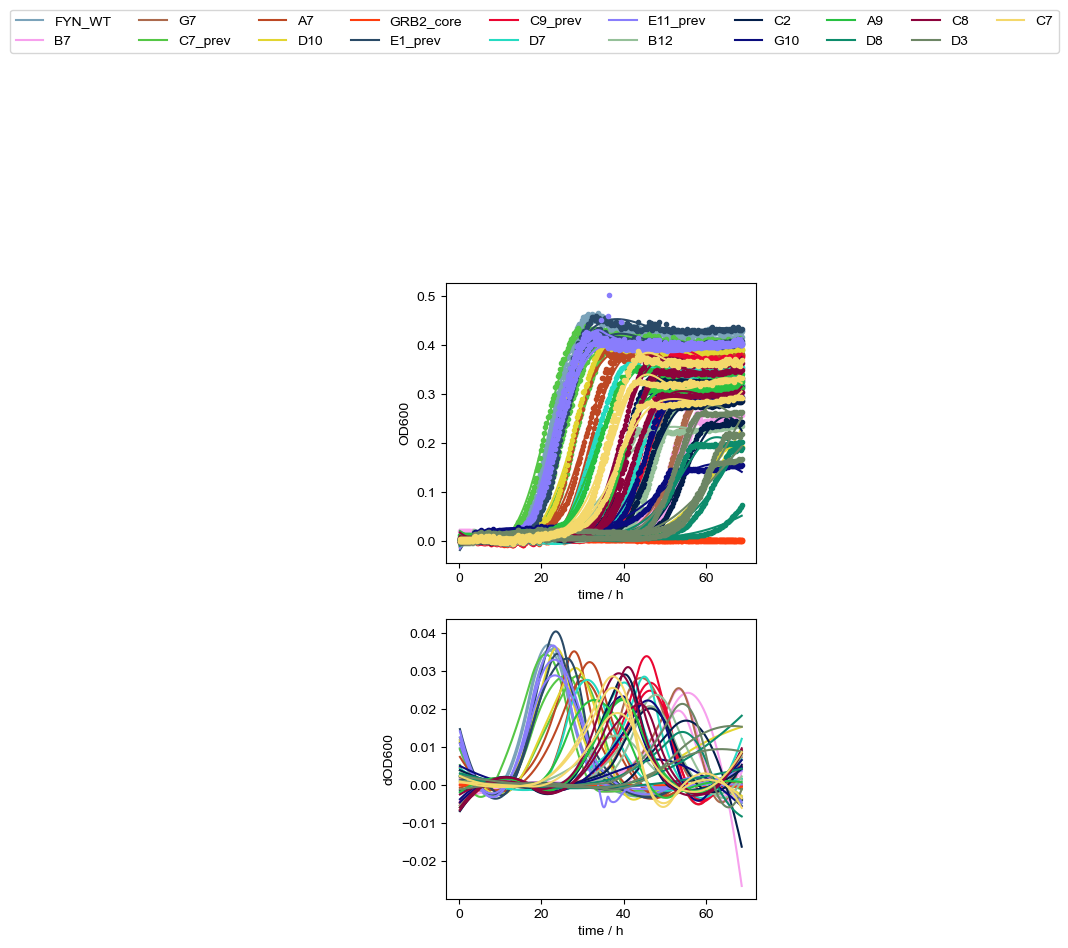

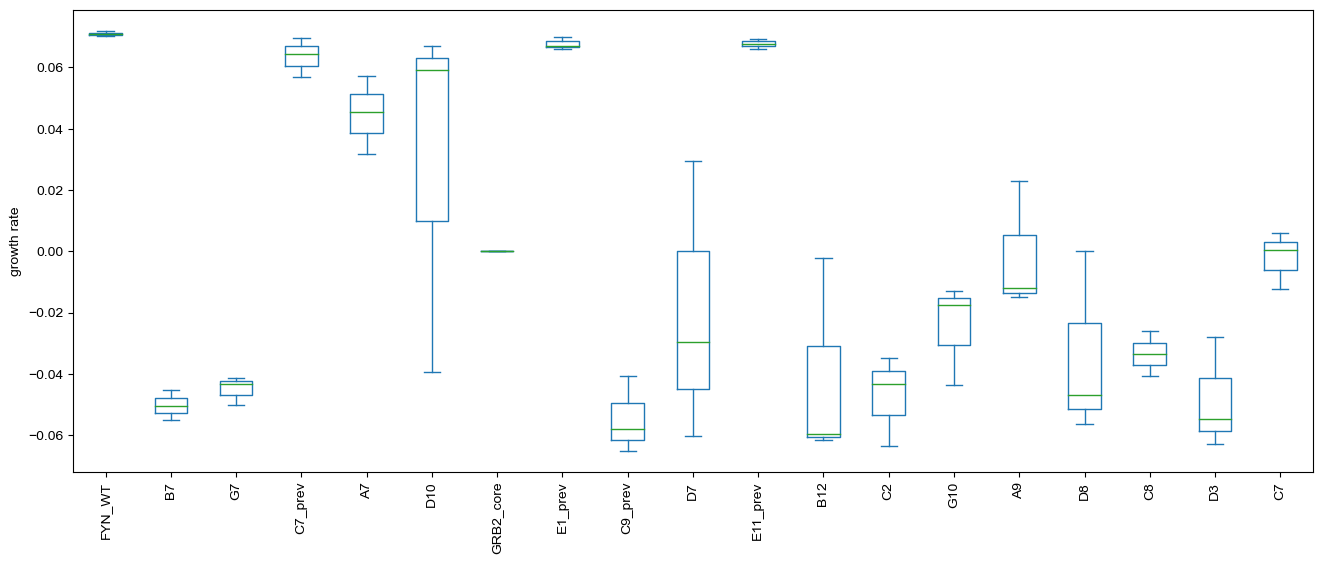

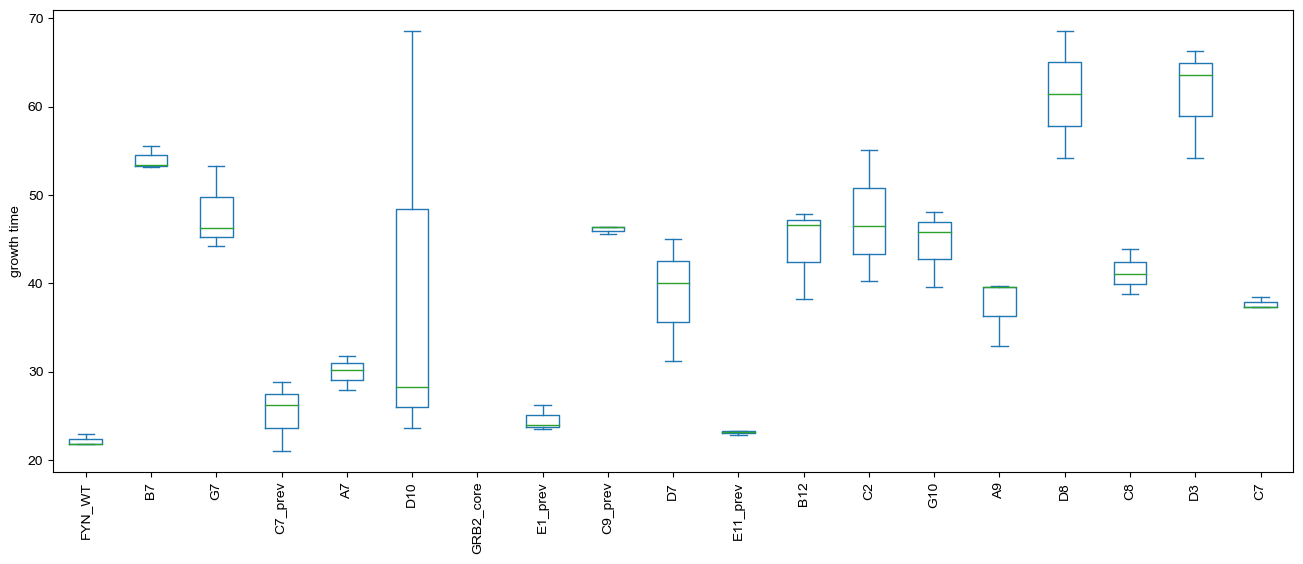

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline
import warnings
import math

# get Tecan machine data
data=pd.read_csv(path+"Fig4/FYN-SH3_prediction_Tecan.txt", header=0, delim_whitespace=True)

# remove columns without data
data = data.iloc[:,0:269]

final_cycle_col=len(data.columns)-1
data2=data
data2=data2.drop(data2.index[[0,1]])
data2.index=data2.Cycle
data2 = data2.drop('Cycle', axis=1)

# get well information (randomization file)
plasmid_info=pd.read_csv(path+"Fig4/FYN-SH3_prediction_Tecan_randomization.txt", header=0, delim_whitespace=True)
#plasmid_info=pd.read_csv(path+"231102_Randomization_FYN_stability_validation.txt", header=0, delim_whitespace=True)
plasmid_info.index=plasmid_info.well
plasmid_info = plasmid_info.drop('well',axis=1)
data2= pd.concat([data2, plasmid_info], axis=1)
#data2 = data2.drop('rand', 1)

blanks = data2.loc[data2['plasmid'] == 'blank']
blanks = blanks.drop('plasmid', axis=1)
blanks = pd.DataFrame(blanks.mean().to_dict(),index=[blanks.index.values[-1]])
blanks = blanks.reset_index()
del blanks['index']

data2 = data2.drop('plasmid', axis=1)

data3 = pd.DataFrame(columns=np.arange(1,final_cycle_col+1,1))
for index, row in data2.iterrows():
    a=list(row-blanks.loc[0])
    data3.loc[index]=a


data3= pd.concat([data3, plasmid_info], axis=1)   

data.index=data.Cycle
data = data.drop('Cycle', axis=1)

cols=np.arange(1,final_cycle_col+1,1)
time=[]
for i,j in zip(data.iloc[0],cols):
    time.append(int(j)*921.3/3600)

to_plot = [i for i in list(plasmid_info['plasmid'].unique()) if i != 'blank']
rows = pd.DataFrame(columns=np.arange(1,final_cycle_col+1,1))
for i in to_plot:
    rows = pd.concat([rows, data3.loc[data3['plasmid'] == i]], axis=0)
    
plt.figure(figsize=(4,8))
plasmids=[]
colors=[]
for index,row in rows.iterrows():
    if row['plasmid'] not in plasmids:
        plasmids.append(row['plasmid'])
        r = lambda: random.randint(0,255)
        colors.append('#%02X%02X%02X' % (r(),r(),r()))
    row = row.drop(['plasmid'])
    row.index=time
    x = time
    y = row[:]
    y_spl = UnivariateSpline(x,y, s=0.02)
    l = final_cycle_col
    x_range = np.linspace(x[0],x[l-1],1000)
    plt.subplot(211)
    plt.plot(x,y, 'o', markersize=3, c=colors[-1], label=plasmids[-1])
    plt.plot(x_range, y_spl(x_range), '-', c=colors[-1], label=plasmids[-1])
    plt.xlabel('time / h')
    plt.ylabel('OD600')
    #Derivative  
    deriv = y_spl.derivative()(x_range)
    #2nd Derivative  
    secnd_deriv = y_spl.derivative(n=2)(x_range)
    #Plot derivative
    plt.subplot(212)
    plt.plot(x_range, deriv, c=colors[-1], label=plasmids[-1])
    plt.xlabel('time / h')
    plt.ylabel('dOD600')
    dmax = max(deriv)
    if dmax > 0.005:
        cp = x_range[np.argmax(deriv)]
    else:
        cp = np.nan
    data3.at[index,'growth_t']=cp
    try:
        data3.at[index,'growthrate']=math.log(y_spl(x_range[np.argmax(deriv)])/y_spl(x_range)[0])/cp
    except ValueError:
        data3.at[index,'growthrate']=math.log(y_spl(x_range[np.argmax(deriv)])/(-1*y_spl(x_range)[0]))/cp

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor = (2, 3.2),ncol=10)
plt.show()

for index, row in data3.iterrows():
    slope = 0
    if max(row[:-4]) > 0.1:
        b=max(row[:-4])
        a = min(i for i in row[:row[row == b].index[0]] if i > 0.05)
        odt1=row[row == a].index[0]
        if max(row[:row[row == b].index[0]]) < 0.3:
            a = max(row[:row[row == b].index[0]])
            odt2=row[row == a].index[0]-1
        else:
            a = min(i for i in row[:row[row == b].index[0]] if i > 0.3)
            odt2=row[row == a].index[0]-1
        odt1=1
        odt2=time.index(30.71)
        delta_t=(data.loc['Time'][odt2]-data.loc['Time'][odt1-1])/3600
        slope=math.log(row[odt2]/0.05)/delta_t
    data3.at[index,'slope']=slope

rows2 = pd.DataFrame()
growth_t2 = pd.DataFrame()
for i in to_plot:
    rows = pd.DataFrame()
    rows[i] = data3.loc[data3['plasmid'] == i]['slope']
    rows=rows.reset_index()
    rows2[i]=rows[i]
    
    growth_t = pd.DataFrame()
    growth_t[i] = data3.loc[data3['plasmid'] == i]['growth_t']
    growth_t=growth_t.reset_index()
    growth_t2[i]=growth_t[i]

rows2.plot.box(figsize=(16,6))
plt.ylabel('growth rate')
plt.xticks(rotation=90)
growth_t2.plot.box(figsize=(16,6))
plt.ylabel('growth time')
plt.xticks(rotation=90)
plt.show()


In [17]:
validation_tecan=pd.DataFrame()
for i in to_plot:
    validation_tecan2=pd.DataFrame()
    validation_tecan2[i]=data3.loc[data3['plasmid'] == i]['growthrate']
    validation_tecan2=validation_tecan2.reset_index()
    validation_tecan=pd.concat([validation_tecan, validation_tecan2[i]], axis=1)

validation_tecan.columns=to_plot
validation_tecan

,FYN_WT,B7,G7,C7_prev,A7,D10,GRB2_core,E1_prev,C9_prev,D7,E11_prev,B12,C2,G10,A9,D8,C8,D3,C7
0,0.162337,0.074336,0.093548,0.128422,0.159626,0.123776,NaN,0.102572,0.067167,0.065802,0.127517,0.061673,0.066507,0.070781,0.134315,0.046070,0.068946,0.071609,0.152887
1,0.170119,0.074612,0.065494,0.196823,0.137877,0.102826,NaN,0.121062,0.064298,0.118961,0.118578,0.112264,0.068892,0.064155,0.080053,0.078426,0.054538,0.059339,0.098016
2,0.193397,0.037828,0.071700,0.112425,0.094569,0.062595,NaN,0.188495,0.064154,0.067043,0.134203,0.061400,0.064526,0.078666,0.053438,NaN,0.107260,0.070609,0.168793


In [18]:
ids = pd.read_csv(path+"Fig4/FYN-SH3_prediction_Tecan_ids.csv", sep='\t', lineterminator='\n').drop('Unnamed: 0', axis=1)[['well','core','Nham_aa','predicted']]

controls = ['pGJJ025', 'pGJJ034']

for index, row in ids.iterrows():
    ids.at[index,'predicted_fitness']=predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==row.core].iloc[0]['mean']
    ids.at[index,'predicted_fitness_std']=predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==row.core].iloc[0]['std']
    ids.at[index,'Nham_aa']=predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['core']==row.core].iloc[0]['Nham_aa']

ids.head()

DMS_tecan = pd.DataFrame(validation_tecan.mean(skipna=True))
DMS_tecan = DMS_tecan.rename(columns={0: 'Tecan_Growth_T'})
DMS_tecan['Tecan_Growth_T_std']=validation_tecan.std(skipna=True)
DMS_tecan = DMS_tecan.reset_index()

DMS_tecan = DMS_tecan.merge(ids, left_on=['index'], right_on=['well'], how='left').drop('index', axis=1)

DMS_tecan = DMS_tecan.dropna()

for index, row in DMS_tecan.iterrows():
    if row.predicted == True:
        DMS_tecan.at[index,'In training set']=False
    else:
        DMS_tecan.at[index,'In training set']=True

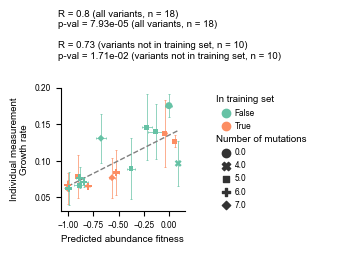

In [19]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

DMS_tecan=DMS_tecan.rename(columns={'Nham_aa': 'Number of mutations'})
DMS_tecan=DMS_tecan.sort_values('predicted_fitness')

symbols=['o','X','s','P','D']
markers={}
for status, symbol in zip([0,4,5,6,7], symbols):
    markers[status]=symbol

fig, ax = plt.subplots(figsize=(1.6,1.6))

plt.errorbar('predicted_fitness', 'Tecan_Growth_T', 'Tecan_Growth_T_std','predicted_fitness_std', elinewidth=0.5, capsize=1, capthick=0.5, markersize=0, linewidth=0,data=DMS_tecan.loc[DMS_tecan['In training set']==True], color=matplotlib.cm.get_cmap('Set2')(1), label='')
plt.errorbar('predicted_fitness', 'Tecan_Growth_T', 'Tecan_Growth_T_std','predicted_fitness_std', elinewidth=0.5, capsize=1, capthick=0.5, markersize=0, linewidth=0,data=DMS_tecan.loc[DMS_tecan['In training set']==False], color=matplotlib.cm.get_cmap('Set2')(0), label='')

sns.scatterplot(x='predicted_fitness', y='Tecan_Growth_T', data=DMS_tecan, hue='In training set', style='Number of mutations', palette='Set2', ax=ax, s=25, linewidth=0, zorder=10)

x = DMS_tecan[['predicted_fitness']].to_numpy()
y = DMS_tecan[['Tecan_Growth_T']].to_numpy()

ax.annotate('n = '+f"{len(DMS_tecan.index):,}", (0,0.02), fontsize=6)

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r,p = pearsonr(y.ravel(),y_pred.ravel())


x_notintraining = DMS_tecan.loc[DMS_tecan['In training set']==False][['predicted_fitness']].to_numpy()
y_notintraining = DMS_tecan.loc[DMS_tecan['In training set']==False][['Tecan_Growth_T']].to_numpy()

model = LinearRegression()
model.fit(x_notintraining, y_notintraining)

y_pred_notintraining = model.predict(x_notintraining)
r_predicted,p_predicted = pearsonr(y_notintraining.ravel(),y_pred_notintraining.ravel())

plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
plt.legend(bbox_to_anchor=(1.2,1), fontsize=6,frameon=False, handletextpad=0.1, ncols=1)

plt.xlabel('Predicted abundance fitness', fontsize=7)
plt.ylabel('Individual measurement\nGrowth rate', fontsize=7)
plt.yticks(ticks=np.arange(0.05,0.25,0.05), fontsize=6)
plt.xticks(ticks=np.arange(-1,0.25,0.25),fontsize=6)
ax.spines[['right', 'top']].set_visible(False)

leg = ax.get_legend()
for t in leg.get_texts():
    if t.get_text() in ['Number of mutations', 'In training set']:
        #t.set_weight('bold')
        t.set_fontsize(7)
        t.set_ha('left')
        t.set_position((-19,0))

plt.annotate('R = '+str(round(r,2))+' (all variants, n = '+str(len(x))+')\np-val = '+'{:0.2e}'.format(p)+' (all variants, n = '+str(len(x))+')\n\nR = '+str(round(r_predicted,2))+' (variants not in training set, n = '+str(len(x_notintraining))+')\np-val = '+'{:0.2e}'.format(p_predicted)+' (variants not in training set, n = '+str(len(x_notintraining))+')',xy=(-1.1,0.24),fontsize=7, annotation_clip=False)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('Fitness_measured_in_permilib_vs_predicted_from_coreDTSlibii.svg', dpi=300, transparent=True, bbox_inches='tight')

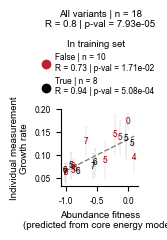

In [20]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import ast


predicted_vs_measured=DMS_tecan.sort_values('predicted_fitness',ascending=True).copy()
predicted_vs_measured=predicted_vs_measured.rename(columns={'Observed': 'In training set'})
    
fig, ax = plt.subplots(figsize=(1,1))

sns.scatterplot(x='predicted_fitness', y='Tecan_Growth_T', data=predicted_vs_measured, hue='In training set', palette=['#BB202E','black'], ax=ax, s=0, markers=markers, edgecolor='k', linewidth=0.1)
plt.errorbar('predicted_fitness', 'Tecan_Growth_T', 'Tecan_Growth_T_std','predicted_fitness_std', elinewidth=0.1, capsize=0.3, capthick=0.1, markersize=0, linewidth=0,data=predicted_vs_measured.loc[predicted_vs_measured['In training set']==False], color='#BB202E', label='')
plt.errorbar('predicted_fitness', 'Tecan_Growth_T', 'Tecan_Growth_T_std','predicted_fitness_std', elinewidth=0.1, capsize=0.3, capthick=0.1, markersize=0, linewidth=0,data=predicted_vs_measured.loc[predicted_vs_measured['In training set']==True], color='black', label='')


x = predicted_vs_measured[['predicted_fitness']].to_numpy()
y = predicted_vs_measured[['Tecan_Growth_T']].to_numpy()

#ax.annotate('n = '+f"{len(predicted_vs_measured.loc[predicted_vs_measured['permi_lib_gr'].notnull()].index):,}", (-0.3,-1.05), fontsize=6)

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r,p = pearsonr(y.ravel(),y_pred.ravel())

plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
plt.text(-0.45,0.38,'All variants | n = '+str(len(x))+'\nR = '+str(round(r,2))+ ' | p-val = '+'{:0.2e}'.format(p), fontsize=7, color='black', horizontalalignment='center')
bbox_to_anchor=(0.4,1.3)
legend0=plt.legend(bbox_to_anchor=bbox_to_anchor,fontsize=6,frameon=False, handletextpad=0.1, title='In training set')
plt.xlabel('Abundance fitness\n(predicted from core energy model)', fontsize=7)
plt.ylabel('Individual measurement\nGrowth rate', fontsize=7)
plt.yticks(ticks=np.arange(0.05,0.25,0.05), fontsize=6)
ax.set_xticks(np.arange(-1,0.5,0.5))
ax.set_xticklabels(np.arange(-1,0.5,0.5), fontsize=6)
ax.spines[['right', 'top']].set_visible(False)

def label_point(x, y, val1, val2, ax, colors):
    a = pd.concat({'x': x, 'y': y, 'val1': val1, 'val2': val2}, axis=1)
    col = a.iloc[0]['x']
    counter=0
    for index, row in a.iterrows():
        if row.val2 == False:
            ax.text(row['x'], row['y'], str(int(row['val1'])), fontsize=6, color=colors[0], ha='center', va='center')
        else:
            ax.text(row['x'], row['y'], str(int(row['val1'])), fontsize=6, color=colors[1], ha='center', va='center')

#colors=list(sns.color_palette('ocean_r',2))
colors=['#8B0000','black']


label_point(pd.Series(x.ravel()).loc[pd.Series(y.ravel()).notnull()], pd.Series(y.ravel()).loc[pd.Series(y.ravel()).notnull()], predicted_vs_measured.reset_index()['Number of mutations'], predicted_vs_measured.reset_index()['In training set'], plt.gca(), colors)

legend_labels=[]
for i in legend0.get_texts():
    x = predicted_vs_measured.loc[predicted_vs_measured['In training set']==ast.literal_eval(i.get_text())][['predicted_fitness']].to_numpy()
    y = predicted_vs_measured.loc[predicted_vs_measured['In training set']==ast.literal_eval(i.get_text())][['Tecan_Growth_T']].to_numpy()
    model.fit(x, y)

    y_pred = model.predict(x)
    r,p = pearsonr(y.ravel(),y_pred.ravel())
    
    legend_labels.append(i.get_text()+' | n = '+str(len(x))+'\nR = '+str(round(r,2))+ ' | p-val = '+'{:0.2e}'.format(p))
    #legend_labels.append(i.get_text())

handles, labels= ax.get_legend_handles_labels()
labels=legend_labels
legend=ax.legend(handles,labels,bbox_to_anchor=(1.3,2), fontsize=6,frameon=False, handletextpad=0.1, title='In training set')
legend.get_title().set_fontsize('7')


plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('Fitness_measured_in_permilib_vs_predicted_from_coreDTSlib.svg', dpi=300, transparent=True, bbox_inches='tight')

## Panel g

In [21]:
# Correct indels in suppressor sequences

import ast
import pandas as pd

all_permissivity_seqs=pd.read_csv(path+'Fig6/Suppressor_library_allseqs.txt', sep='\t')

for index, row in all_permissivity_seqs.iterrows():
    if row.mutations.startswith('[')==True:
        mutations = ast.literal_eval(row.mutations)
        deletions=[]
        for mutation in mutations:
            if mutation[-1]=='-':
                deletions.append(mutation[1:-1])
        if len(deletions)>0:
            all_permissivity_seqs.at[index,'deletions']=','.join(deletions)
        full_variant=row.variant
        for deletion in deletions:
            full_variant = full_variant[:int(deletion)-1]+'-'+full_variant[int(deletion)-1:]
        all_permissivity_seqs.at[index,'full_variant']=full_variant
        all_permissivity_seqs.at[index,'full_variant_len']=len(full_variant)


permi_variants = pd.read_csv(path+'Fig6/FYN_suppressor_fitness_replicates.txt', sep='\t')

In [22]:
from seaborn import kdeplot
import numpy as np
import matplotlib.pyplot as plt

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

permi_variants_scaled = permi_variants.copy()

arbitraryWT='FLFFVIV'

fig, ax = plt.subplots()

my_kde = kdeplot(data=permi_variants.loc[permi_variants['fitness']<-0.5], x='fitness', ax=ax)

lines = my_kde.get_lines()
plt.close()
for line in lines:
    x, y = line.get_data()
    mode=(x[np.argmax(y)])
    ax.axvline(x[np.argmax(y)], ls='--')

permi_variants_scaled['fitness']=normalize(list(permi_variants_scaled['fitness']),{'actual': {'lower': mode, 'upper': permi_variants_scaled.loc[permi_variants_scaled['Nham_aa']==0]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
permi_variants_scaled['fitness1_uncorr']=normalize(list(permi_variants_scaled['fitness1_uncorr']),{'actual': {'lower': mode, 'upper': permi_variants_scaled.loc[permi_variants_scaled['Nham_aa']==0]['fitness1_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
permi_variants_scaled['fitness2_uncorr']=normalize(list(permi_variants_scaled['fitness2_uncorr']),{'actual': {'lower': mode, 'upper': permi_variants_scaled.loc[permi_variants_scaled['Nham_aa']==0]['fitness2_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
permi_variants_scaled['fitness3_uncorr']=normalize(list(permi_variants_scaled['fitness3_uncorr']),{'actual': {'lower': mode, 'upper': permi_variants_scaled.loc[permi_variants_scaled['Nham_aa']==0]['fitness3_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})


fig, ax = plt.subplots()

my_kde = kdeplot(data=permi_variants_scaled, x='fitness', ax=ax)

lines = my_kde.get_lines()

for line in lines:
    x, y = line.get_data()

plt.close()

In [23]:
WTs_bearing_natural_DTS_core_queries=pd.read_csv(path+'Fig6/Structural_homologs_carrying_detrimental_cores_in_FYN.txt',sep='\t')

for index, row in permi_variants_scaled.iterrows():
    if row.aa_seq in list(WTs_bearing_natural_DTS_core_queries['DSSP_boundaries']) or row.aa_seq in list(WTs_bearing_natural_DTS_core_queries['Pro_mutant_1']) or row.aa_seq in list(WTs_bearing_natural_DTS_core_queries['Pro_mutant_2']) or row.aa_seq in list(WTs_bearing_natural_DTS_core_queries['Pro_mutant_3']):
        permi_variants_scaled.at[index,'other_natural_SH3s']=True
        if row.aa_seq in list(WTs_bearing_natural_DTS_core_queries['DSSP_boundaries']):
            permi_variants_scaled.at[index,'Pro_mutant']=False
        else:
            permi_variants_scaled.at[index,'Pro_mutant']=True

other_natural_SH3s = permi_variants_scaled.loc[permi_variants_scaled['other_natural_SH3s']==True].copy()

In [24]:
# Find core and hamming distances

fyn_core_pos = [2,16,18,24,26,48,53]
fyn_wt_core = 'FLFFIIV'
fyn_permi_variants = permi_variants_scaled.loc[permi_variants_scaled['other_natural_SH3s']!=True].copy()
fyn_wt_seq = permi_variants_scaled.loc[permi_variants_scaled['Nham_aa']==0].iloc[0]['aa_seq']
for index, row in fyn_permi_variants.iterrows():
    fyn_permi_variants.at[index,'full_variant']=all_permissivity_seqs.loc[all_permissivity_seqs['variant']==row.aa_seq].iloc[0]['full_variant']
    core=[]
    for i in fyn_core_pos:
        core.append(all_permissivity_seqs.loc[all_permissivity_seqs['variant']==row.aa_seq].iloc[0]['full_variant'][i])
    fyn_permi_variants.at[index,'core'] = ''.join(core)
    fyn_permi_variants.at[index, 'Nham_core'] = sum(1 for a,b in zip(core, fyn_wt_core) if a!=b)
    fyn_permi_variants.at[index, 'Nham_aa'] = sum(1 for a,b in zip(all_permissivity_seqs.loc[all_permissivity_seqs['variant']==row.aa_seq].iloc[0]['full_variant'], fyn_wt_seq) if a!=b)
    if len(row.aa_seq) != len(permi_variants.loc[permi_variants['Nham_aa']==0].iloc[0]['aa_seq']):
        fyn_permi_variants.at[index,'indel']=True
    fyn_permi_variants.at[index,'len']=len(row.aa_seq)

for index, row in fyn_permi_variants.iterrows():
    mutations=[]
    iterator=1
    for wt, mut in zip(fyn_wt_seq, row.full_variant):
        if wt != mut:
            mutations.append(wt+str(iterator)+mut)
        iterator+=1
    fyn_permi_variants.at[index,'all_mutations']=','.join(mutations)

In [25]:
import math

for index, row in predicted_phenotypes_scaled.iterrows():
    try:
        predicted_phenotypes_scaled.at[index,'permi_lib_fitness'] = fyn_permi_variants.loc[fyn_permi_variants['aa_seq']==row.aa_seq].iloc[0]['fitness']
        predicted_phenotypes_scaled.at[index,'permi_lib_sigma']   = fyn_permi_variants.loc[fyn_permi_variants['aa_seq']==row.aa_seq].iloc[0]['sigma']
        predicted_phenotypes_scaled.at[index,'permi_lib_gr']      = fyn_permi_variants.loc[fyn_permi_variants['aa_seq']==row.aa_seq].iloc[0]['growthrate']
    except IndexError:
        continue
        
for index, row in predicted_phenotypes_scaled.loc[predicted_phenotypes_scaled['permi_lib_gr'].notnull()].iterrows():
    if math.isnan(row.fitness) == True:
        predicted_phenotypes_scaled.at[index,'Observed']=False
    else:
        predicted_phenotypes_scaled.at[index,'Observed']=True

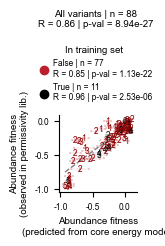

In [26]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import ast


predicted_vs_measured=predicted_phenotypes_scaled.sort_values('mean',ascending=True).copy()
predicted_vs_measured=predicted_vs_measured.rename(columns={'Observed': 'In training set'})
    
fig, ax = plt.subplots(figsize=(1,1))

sns.scatterplot(x='mean', y='permi_lib_fitness', data=predicted_vs_measured.loc[predicted_vs_measured['permi_lib_gr'].notnull()], hue='In training set', palette=['#BB202E','black'], ax=ax, s=0, markers=markers, edgecolor='k', linewidth=0.1)
plt.errorbar('mean', 'permi_lib_fitness', 'permi_lib_sigma','std', elinewidth=0.1, capsize=1, capthick=0.3, markersize=0.1, linewidth=0,data=predicted_vs_measured.loc[predicted_vs_measured['permi_lib_gr'].notnull()].loc[predicted_vs_measured['In training set']==False], color='#BB202E', label='')
plt.errorbar('mean', 'permi_lib_fitness', 'permi_lib_sigma','std', elinewidth=0.1, capsize=1, capthick=0.3, markersize=0.1, linewidth=0,data=predicted_vs_measured.loc[predicted_vs_measured['permi_lib_gr'].notnull()].loc[predicted_vs_measured['In training set']==True], color='black', label='')


x = predicted_vs_measured.loc[predicted_vs_measured['permi_lib_gr'].notnull()][['mean']].to_numpy()
y = predicted_vs_measured.loc[predicted_vs_measured['permi_lib_gr'].notnull()][['permi_lib_fitness']].to_numpy()

#ax.annotate('n = '+f"{len(predicted_vs_measured.loc[predicted_vs_measured['permi_lib_gr'].notnull()].index):,}", (-0.3,-1.05), fontsize=6)

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r,p = pearsonr(y.ravel(),y_pred.ravel())

plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
plt.text(-0.45,1.4,'All variants | n = '+str(len(x))+'\nR = '+str(round(r,2))+ ' | p-val = '+'{:0.2e}'.format(p), fontsize=7, color='black', horizontalalignment='center')
bbox_to_anchor=(0.4,1.3)
legend0=plt.legend(bbox_to_anchor=bbox_to_anchor,fontsize=6,frameon=False, handletextpad=0.1, title='In training set')
plt.xlabel('Abundance fitness\n(predicted from core energy model)', fontsize=7)
plt.ylabel('Abundance fitness\n(observed in permissivity lib.)', fontsize=7)
ax.set_xticks(np.arange(-1,0.5,0.5))
ax.set_xticklabels(np.arange(-1,0.5,0.5), fontsize=6)
ax.set_yticks(np.arange(-1,0.5,0.5))
ax.set_yticklabels(np.arange(-1,0.5,0.5), fontsize=6)
ax.spines[['right', 'top']].set_visible(False)

def label_point(x, y, val1, val2, ax, colors):
    a = pd.concat({'x': x, 'y': y, 'val1': val1, 'val2': val2}, axis=1)
    col = a.iloc[0]['x']
    counter=0
    for index, row in a.iterrows():
        if row.val2 == False:
            ax.text(row['x'], row['y'], str(int(row['val1'])), fontsize=6, color=colors[0], ha='center', va='center')
        else:
            ax.text(row['x'], row['y'], str(int(row['val1'])), fontsize=6, color=colors[1], ha='center', va='center')

#colors=list(sns.color_palette('ocean_r',2))
colors=['#8B0000','black']


label_point(pd.Series(x.ravel()).loc[pd.Series(y.ravel()).notnull()], pd.Series(y.ravel()).loc[pd.Series(y.ravel()).notnull()], predicted_vs_measured.loc[predicted_vs_measured['permi_lib_gr'].notnull()].reset_index()['Nham_aa'], predicted_vs_measured.loc[predicted_vs_measured['permi_lib_gr'].notnull()].reset_index()['In training set'], plt.gca(), colors)

legend_labels=[]
for i in legend0.get_texts():
    x = predicted_vs_measured.loc[predicted_vs_measured['permi_lib_gr'].notnull()].loc[predicted_vs_measured['In training set']==ast.literal_eval(i.get_text())][['mean']].to_numpy()
    y = predicted_vs_measured.loc[predicted_vs_measured['permi_lib_gr'].notnull()].loc[predicted_vs_measured['In training set']==ast.literal_eval(i.get_text())][['permi_lib_fitness']].to_numpy()
    model.fit(x, y)

    y_pred = model.predict(x)
    r,p = pearsonr(y.ravel(),y_pred.ravel())
    
    legend_labels.append(i.get_text()+' | n = '+str(len(x))+'\nR = '+str(round(r,2))+ ' | p-val = '+'{:0.2e}'.format(p))
    #legend_labels.append(i.get_text())

handles, labels= ax.get_legend_handles_labels()
labels=legend_labels
legend=ax.legend(handles,labels,bbox_to_anchor=(1.3,2), fontsize=6,frameon=False, handletextpad=0.1, title='In training set')
#legend=plt.legend()
legend.get_title().set_fontsize('7')
legend._legend_box.align = "center"


plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('Fitness_measured_in_permilib_vs_predicted_from_coreDTSlib_simplified.svg', dpi=300, transparent=True, bbox_inches='tight')